Bag of N grams

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus=["I love machine learning"]
v= CountVectorizer()
v.fit(corpus)
v.vocabulary_

{'love': 1, 'machine': 2, 'learning': 0}

In [5]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus)
v.vocabulary_


{'love': 1,
 'machine': 3,
 'learning': 0,
 'love machine': 2,
 'machine learning': 4}

In [6]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(corpus)
v.vocabulary_


{'love': 1,
 'machine': 4,
 'learning': 0,
 'love machine': 2,
 'machine learning': 5,
 'love machine learning': 3}

In [16]:
corpus1 = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [12]:
import spacy 
#load english language model and create nlp object
nlp= spacy.load("en_core_web_sm")

def preprocess(text):
    #remove stop words and lemmatize the text 
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct :
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


In [13]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [14]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [17]:
corpus_preprocessed =[
    preprocess(text) for text in corpus1
]
corpus_preprocessed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [18]:
v=CountVectorizer( ngram_range= (1,2))
v.fit(corpus_preprocessed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

generate bag of n gram vector for few sample documents
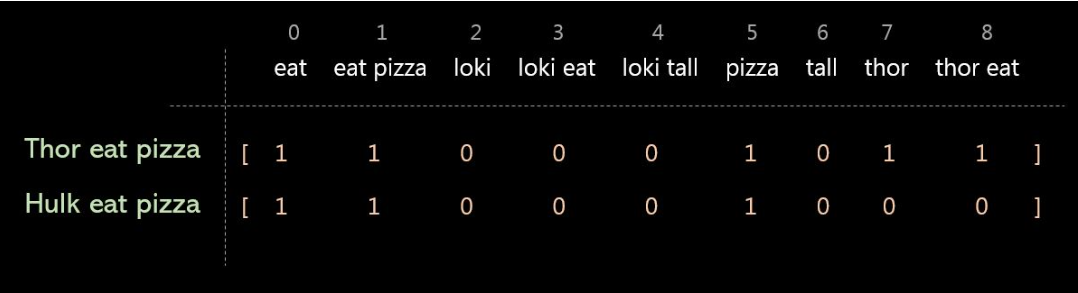

In [19]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [21]:
#lets us consider out of vocabulary problem (OOV)
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

News Category Classification Problem
We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

BUSINESS
SPORTS
CRIME
SCIENCE

Dataset
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns. - Text - Category
Text is a news article
Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset

In [ ]:
c:\Users\Admin\Downloads\news_dataset.json